# Demonstration Notebook
**Guillaume Witz, Science IT Support, Bern University**

## Importing packages 

In [2]:
import numpy as np
import skimage
import ipyvolume.pylab as p3
import ipywidgets as ipw
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib
cmap = matplotlib.colors.ListedColormap (np.random.rand(256,3))

## Import data

The dataset used here is from the CVLAB at EPFL and can be found [here](https://www.epfl.ch/labs/cvlab/data/data-em/).

In [3]:
image3D = skimage.io.imread('../Samples/training.tif')
image3Db = skimage.io.imread('../Samples/training_groundtruth.tif')

## Process data

In [4]:
image_label = skimage.measure.label(image3Db).astype(float)
image_label[image_label==0] = np.nan

## Plot data

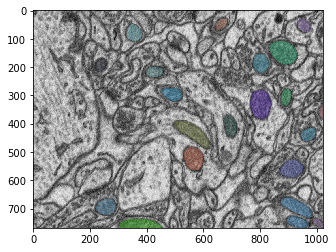

In [5]:
plt.imshow(image3D[51,:,:], cmap = 'gray')
plt.imshow(image_label[51,:,:], cmap = cmap, alpha = 0.3)
plt.show()

## Create interactive view

This is a minimalistic example:

In [17]:
def plot(plane, image, image_label):
    fig = plt.figure(figsize=(7,7))
    plt.imshow(image[plane,:,:], cmap = 'gray')
    plt.imshow(image_label[plane,:,:], cmap = cmap, alpha = 0.3)
    plt.show()

In [18]:
ipw.interactive(plot, plane = ipw.IntSlider(min = 0, max = image3D.shape[0]-1, value = 0, step = 1,
        continuous_update = False), image = ipw.fixed(image3D),image_label = ipw.fixed(image_label))

interactive(children=(IntSlider(value=0, continuous_update=False, description='plane', max=164), Output()), _d…

Now we add two check boxes to decide whether we plot the image and the labels.

In [20]:
def plot(plane, show_image, show_labels, image, image_label):
    fig = plt.figure(figsize=(7,7))
    if show_image: plt.imshow(image[plane,:,:], cmap = 'gray')
    if show_labels: plt.imshow(image_label[plane,:,:], cmap = cmap, alpha = 0.3)
    plt.show()

In [21]:
ipw.interactive(plot, plane = ipw.IntSlider(min = 0, max = image3D.shape[0]-1, value = 0, step = 1,
        continuous_update = False), image = ipw.fixed(image3D),image_label = ipw.fixed(image_label),
               show_image = ipw.Checkbox(value = True, description = 'Show image'),
               show_labels = ipw.Checkbox(value = True, description = 'Show image'))

interactive(children=(IntSlider(value=0, continuous_update=False, description='plane', max=164), Checkbox(valu…

## 3D plotting with ipyvolume

In [22]:
import ipyvolume as ipv

In [24]:
image3D_label = skimage.measure.label(image3Db)

In [30]:
ipv.figure()
vol = ipv.volshow(image3Db,opacity=[0.2,0.0,0.0], level=[0.2,1,1],
                  extent=[[0,1000],[0,1000],[-100,100]])
ipv.xyzlim(0,1000)
ipv.zlim(-500,500)
ipv.style.background_color('black')
vol.brightness = 10
ipv.show()

In [33]:
ipv.save('3d_mito_ipv.html')